In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates=['Date'])

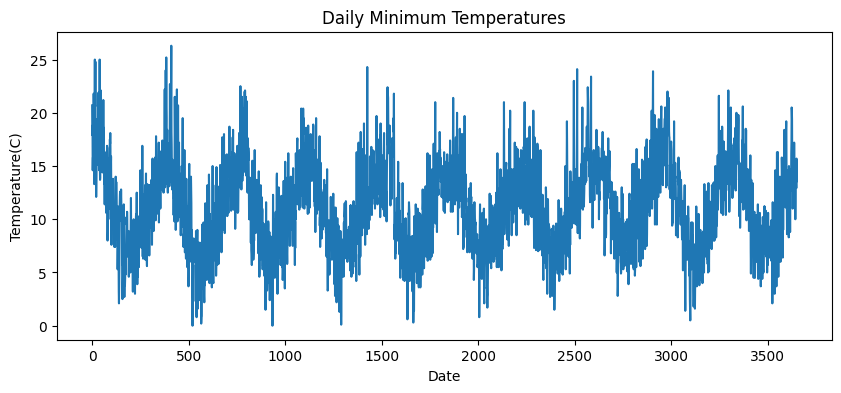

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df['Temp'])
plt.title('Daily Minimum Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature(C)')
plt.show()

In [ ]:
temps = df['Temp'].values.astype(np.float32)
mean = temps.mean()
std = temps.std()
temps = (temps-mean)/std

In [ ]:
def create_sequences(data, window_size):
  X,y = [], []
  for i in range(len(data)-window_size):
    X.append(data[i:i+window_size])
    y.append(data[i+window_size])
  return np.array(X), np.array(y)


In [ ]:
window_size = 7
X,y = create_sequences(temps, window_size)

X=X.reshape((X.shape[0], X.shape[1], 1))

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential([
    SimpleRNN(64, return_sequences=True, activation='tanh', input_shape=(window_size, 1)),
    SimpleRNN(32, activation='tanh'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 7, 64)          │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,361 (28.75 KB)

 Trainable params: 7,361 (28.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.5405 - val_loss: 0.3061
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4030 - val_loss: 0.3124
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3964 - val_loss: 0.3092
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3735 - val_loss: 0.3034
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3880 - val_loss: 0.3037
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3820 - val_loss: 0.3237
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3962 - val_loss: 0.3094
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3456 - val_loss: 0.3009
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3778 - val_loss: 0.3023
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3830 - val_loss: 0.3143
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3902 - val_loss: 0.3015
Epoch 12/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


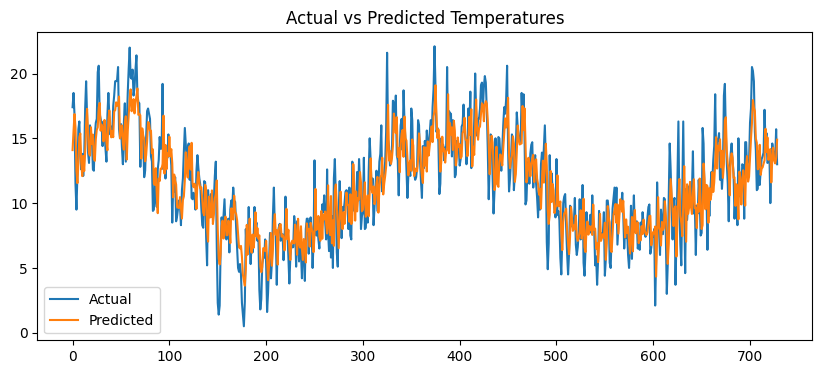

In [ ]:
y_pred = model.predict(X_test)

y_pred_denorm = y_pred * std + mean
y_test_denorm = y_test * std + mean

plt.figure(figsize=(10, 4))
plt.plot(y_test_denorm, label='Actual')
plt.plot(y_pred_denorm, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Temperatures")
plt.show()
